In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pysal.contrib.viz import mapping as maps
from shapely.geometry import Point, Polygon
import re
from IPython.display import IFrame
import mplleaflet
from geopandas import GeoDataFrame
import shapely.speedups
shapely.speedups.enable()
import glob
from shapely import wkt
from shapely.geometry.multipolygon import MultiPolygon
%matplotlib inline

C:\Users\SPullen\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
crs = {'init': 'epsg:4326'}

#import dataframes bomen 
df_boom = pd.concat([pd.read_csv(file, dtype=str, sep=';') for file in glob.glob('Data\BOMEN*')], axis=0, ignore_index=True)

# convert dataframes into geodataframes

df_boom.WKT_LNG_LAT = df_boom.WKT_LNG_LAT.str.replace(',', ' ')
geometry =df_boom['WKT_LNG_LAT'].apply(wkt.loads)
dfg_boom = GeoDataFrame(df_boom, crs=crs, geometry=geometry)

In [3]:
#import dataframes buurt
df_buurt = pd.read_csv("Data/GEBIED_BUURTEN_EXWATER.csv",  delimiter=';')

# convert dataframes into geodataframes
geometry = df_buurt['WKT_LNG_LAT'].apply(wkt.loads)
dfg_buurt = GeoDataFrame(df_buurt, crs=crs, geometry=geometry)


,OBJECTNUMMER,Buurt_code,Buurt,Buurtcombinatie_code,Stadsdeel_code,Opp_m2,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Unnamed: 10,geometry
0,1,T92b,Amstel III deel A/B Noord,T92,T,799537.0,"POLYGON((4.937991 52.310468,4.941598 52.311676...","POLYGON((52.310468 4.937991,52.311676 4.941598...","4,9467015","52,3058421",NaN,"POLYGON ((4.937991 52.310468, 4.941598 52.3116..."
1,2,T92d,Amstel III deel A/B Zuid,T92,T,375393.0,"POLYGON((4.947118 52.299643,4.955402 52.30249,...","POLYGON((52.299643 4.947118,52.30249 4.955402,...","4,9533758","52,2987982",NaN,"POLYGON ((4.947118 52.299643, 4.955402 52.3024..."
2,3,T92f,AMC,T92,T,801524.0,"POLYGON((4.947768 52.293915,4.951268 52.295122...","POLYGON((52.293915 4.947768,52.295122 4.951268...","4,95693705","52,2930209",NaN,"POLYGON ((4.947768 52.293915, 4.951268 52.2951..."
3,4,T93d,F-buurt,T93,T,232024.0,"POLYGON((4.95104 52.316524,4.951822 52.316798,...","POLYGON((52.316524 4.95104,52.316798 4.951822,...","4,9564049","52,31824175",NaN,"POLYGON ((4.95104 52.316524, 4.951822 52.31679..."
4,5,T93e,Amsterdamse Poort,T93,T,431374.0,"POLYGON((4.950458 52.317161,4.95104 52.316524,...","POLYGON((52.317161 4.950458,52.316524 4.95104,...","4,95242595","52,3140456",NaN,"POLYGON ((4.950458 52.317161, 4.95104 52.31652..."
5,6,T93f,Hoptille,T93,T,203598.0,"POLYGON((4.947509 52.310801,4.952533 52.312532...","POLYGON((52.310801 4.947509,52.312532 4.952533...","4,95198535","52,30957665",NaN,"POLYGON ((4.947509 52.310801, 4.952533 52.3125..."
6,7,T93g,Rechte H-buurt,T93,T,196257.0,"POLYGON((4.952533 52.312532,4.955164 52.313444...","POLYGON((52.312532 4.952533,52.313444 4.955164...","4,95673635","52,3111941",NaN,"POLYGON ((4.952533 52.312532, 4.955164 52.3134..."
7,8,T93h,Hakfort/Huigenbos,T93,T,294820.0,"POLYGON((4.951547 52.306636,4.956452 52.308311...","POLYGON((52.306636 4.951547,52.308311 4.956452...","4,957025","52,3057791",NaN,"POLYGON ((4.951547 52.306636, 4.956452 52.3083..."
8,9,T93i,Huntum,T93,T,119177.0,"POLYGON((4.958689 52.309082,4.96093 52.309848,...","POLYGON((52.309082 4.958689,52.309848 4.96093,...","4,96203565","52,3074881",NaN,"POLYGON ((4.958689 52.309082, 4.96093 52.30984..."
9,10,T93j,Vogeltjeswei,T93,T,72302.8,"POLYGON((4.958047 52.317303,4.96176 52.318565,...","POLYGON((52.317303 4.958047,52.318565 4.96176,...","4,96081135","52,3170268",NaN,"POLYGON ((4.958047 52.317303, 4.96176 52.31856..."


In [4]:
#join the tree and buurt data frames
dfg_ggdfsjoin = gpd.sjoin(dfg_buurt,dfg_boom) 

#Group by buurt
df_bb = dfg_ggdfsjoin.Buurt.value_counts().reset_index().rename(columns={'index': 'Buurt', 'Buurt': 'Boom_Count'})

df_bb.head()

,Buurt,Boom_Count
0,Amstelpark,6784
1,Osdorper Binnenpolder,4270
2,G-buurt Oost,3872
3,Buitenveldert Zuidoost,3295
4,Nieuwe Oosterbegraafplaats,3201


In [5]:
df_buurt.set_index(['Buurt'], inplace=True)
df_bb.set_index(['Buurt'], inplace=True)

df_bb2 = df_bb.join(df_buurt).reset_index()

In [8]:
df_bb3 = df_bb2[['Buurt', 'Boom_Count', 'Opp_m2','geometry']].copy()
df_bb3['Boom_m2'] = df_bb3['Boom_Count']/df_bb3['Opp_m2']

,Buurt,Boom_Count,Opp_m2,geometry,Boom_m2
0,Amstelpark,6784,563359.0,"POLYGON ((4.889986 52.329391, 4.889981 52.3331...",0.012042
1,Osdorper Binnenpolder,4270,2100470.0,"POLYGON ((4.75896 52.384112, 4.787352 52.38437...",0.002033
2,G-buurt Oost,3872,971099.0,"POLYGON ((4.991675 52.324431, 4.982315 52.3212...",0.003987
3,Buitenveldert Zuidoost,3295,643193.0,"POLYGON ((4.879478 52.329377, 4.889986 52.3293...",0.005123
4,Nieuwe Oosterbegraafplaats,3201,394066.0,"POLYGON ((4.932628 52.343083, 4.932976 52.3432...",0.008123
5,Buitenveldert Zuidwest,3034,749477.0,"POLYGON ((4.855948 52.330249, 4.856192 52.3302...",0.004048
6,Vliegenbos,2818,395004.0,"POLYGON ((4.924758 52.39066, 4.92506 52.390691...",0.007134
7,Buitenveldert Midden Zuid,2803,543543.0,"POLYGON ((4.868863 52.329134, 4.875988 52.3291...",0.005157
8,Holendrecht Oost,2787,665679.0,"POLYGON ((4.962493 52.304924, 4.965372 52.3059...",0.004187
9,Vondelpark West,2244,247564.0,"POLYGON ((4.855085 52.356402, 4.858944 52.3573...",0.009064


In [18]:
#Calculate tree denisty index
Total_Tree = df_bb3['Boom_Count'].sum()
Total_Opp = df_bb3['Opp_m2'].sum()
boom_Opp_Adam = Total_Tree/Total_Opp
df_bb3['boomdichtheid_index'] = boom_Opp_Adam-df_bb3['Boom_m2']

#Convert to Geodataframe

dfg_bb = GeoDataFrame(df_bb3, crs=crs)

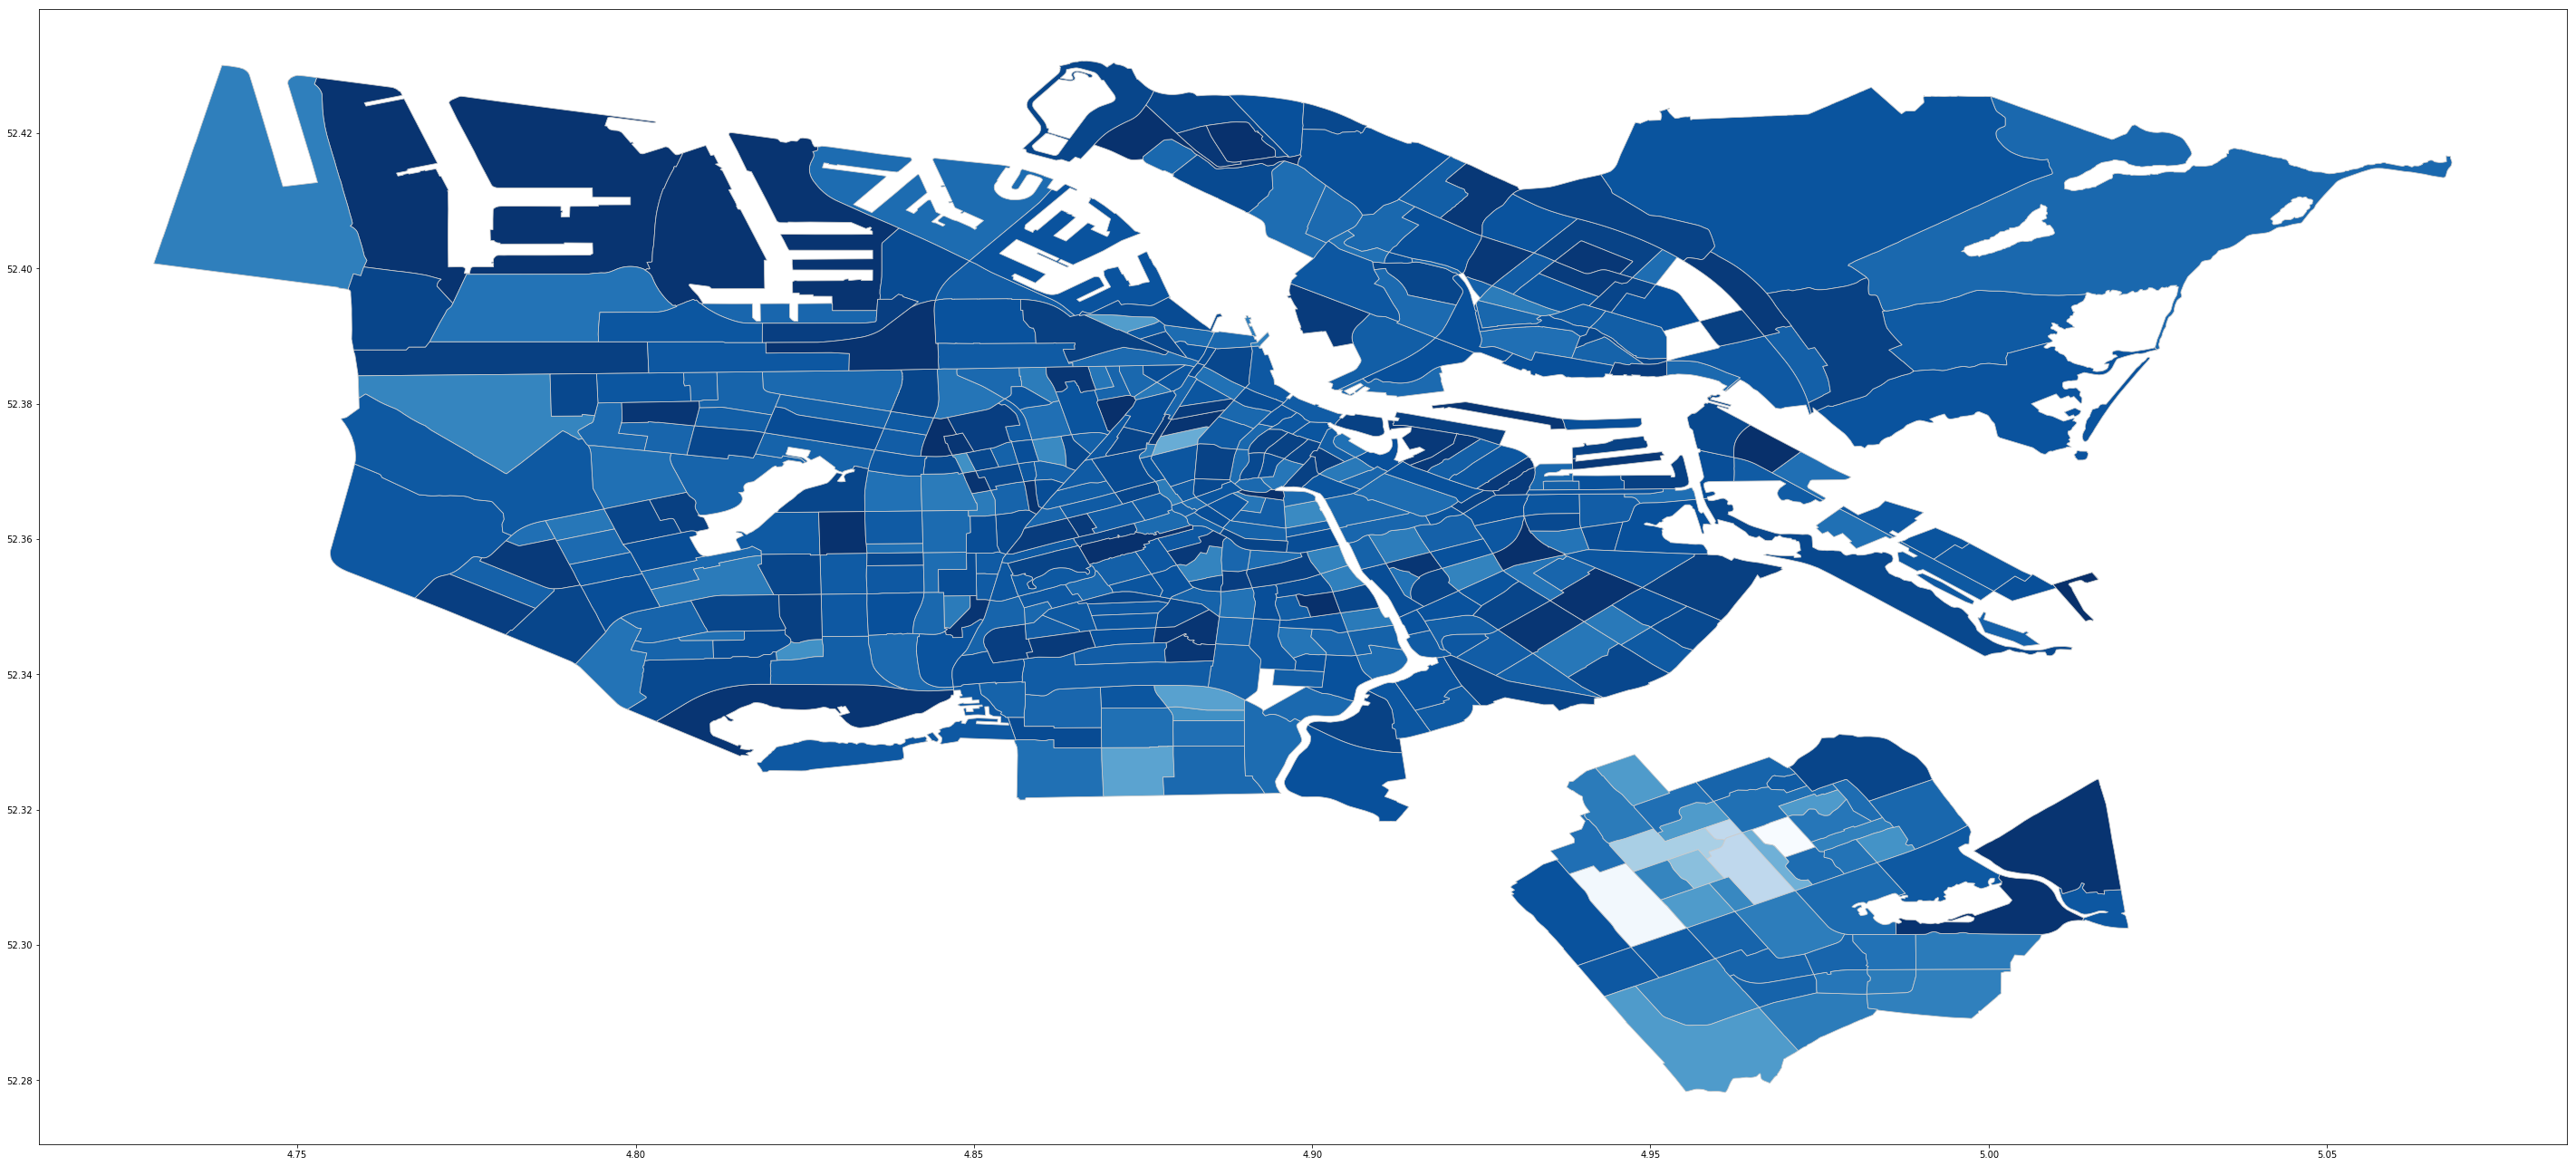

In [30]:
#plot
mplleaflet.show(fig=ax.figure)

variable = df_bb3['boomdichtheid_index']
vmin, vmax = 120, 220

fig, ax = plt.subplots(1, figsize=(50, 60))

dfg_bb.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


